다음과 같은 방법을 사용하면 ARIMA 모형의 차수를 결정하기 위한 정보를 얻을 수 있다.

+ Augmented Dickey-Fuller 검정
+ 자기상관계수 함수
+ 편자기상관계수 함수


이러한 방법을 실제 시계열 자료에 적용하여 ARIMA 모형의 차수를 알아보자.

In [1]:
import matplotlib.pylab as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
import seaborn as sns
import numpy as np

sns.set_style("whitegrid")
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.size'] = 12

path = "/Library/Fonts/NanumGothic.otf"
font_name = fm.FontProperties(fname=path, size=20).get_name()

plt.rc('font', family=font_name)

In [2]:
def yearfraction2datetime(yearfraction, startyear=0):
    import datetime
    import dateutil
    year = int(yearfraction) + startyear
    month = int(round(12 * (yearfraction - year)))
    delta = dateutil.relativedelta.relativedelta(months=month)
    date = datetime.datetime(year, 1, 1) + delta
    return date

## 사례1 : 황체형성 호르몬 수치 시계열 

다음 자료는 황체형성 호르몬 수치 시계열에 대한 시계열 자료이다.

In [4]:
import statsmodels.api as sm
import pandas as pd

In [5]:
data = sm.datasets.get_rdataset("lh")
df = data.data
df.tail()

,time,value
43,44,2.6
44,45,2.1
45,46,3.4
46,47,3.0
47,48,2.9


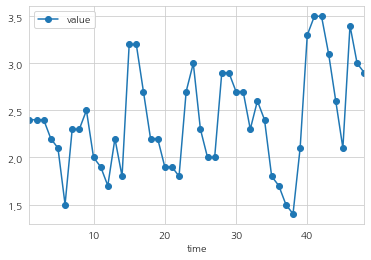

In [6]:
df.plot(x="time", y="value", style=["o-"])
plt.show()

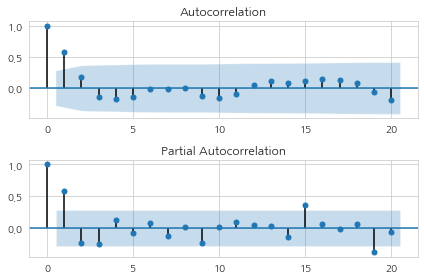

In [7]:
# 위의 데이터의 자기상관계수함수와 편자기상관계수함수 구하기
ax1 = plt.subplot(211)
sm.graphics.tsa.plot_acf(df.value, lags=20, ax=ax1)
ax2 = plt.subplot(212)
sm.graphics.tsa.plot_pacf(df.value, lags=20, ax=ax2)
plt.tight_layout()
plt.show()

위의 그림에서 알 수 있듯이, ACF가 지수함수적으로 감소하는 주기적 파형을 보이고 PACF가 2차항까지 유의한 값을 가지므로 AR(2) 모형으로 볼 수 있다.

## 사례 2 : 호흡기질환 사망자수

다음 시계열 자료는 호흡기질환 사망자수에 대한 연구 자료이다.

In [8]:
data = sm.datasets.get_rdataset("deaths", "MASS")
df = data.data
df.tail()

,time,value
67,1979.583333,1354
68,1979.666667,1333
69,1979.750000,1492
70,1979.833333,1781
71,1979.916667,1915


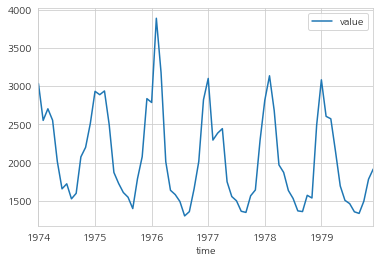

In [9]:
df.plot(x="time", y="value")
plt.show()

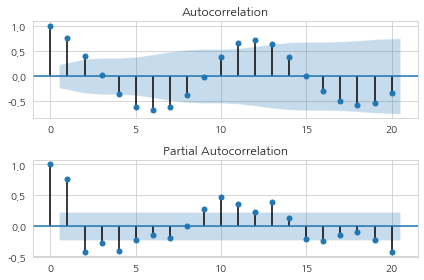

In [10]:
# 데이터의 자기상관계수함수와 편자기상관계수함수 구하기
ax1 = plt.subplot(211)
sm.graphics.tsa.plot_acf(df.value, lags=20, ax=ax1)
ax2 = plt.subplot(212)
sm.graphics.tsa.plot_pacf(df.value, lags=20, ax=ax2)

plt.tight_layout()
plt.show()

자기상관계수함수와 편자기상관계수함수 모두 지수적으로 감소하고 있으나 주기적 파형을 보이고 있다. 

데이터가 계절성 추세를 가지고 있기 때문에 다음과 같이 계절성 추정을 실시한다.

In [11]:
# 계절성 추정을 위한 데이터 분리와 종속변수 값의 로그변환
df["datetime"] = df.time.map(yearfraction2datetime)
df["month"] = df.datetime.dt.month
df["logvalue"] = np.log(df.value)

In [12]:
# 회귀분석
result = sm.OLS.from_formula("logvalue ~ C(month) + time + 0", data=df).fit()
y = result.resid # 잔차

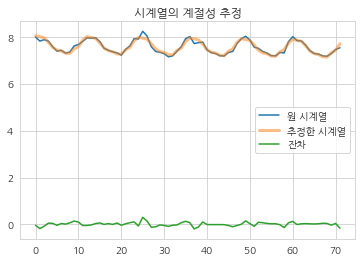

In [14]:
plt.plot(df.logvalue, label="원 시계열")
plt.plot(result.fittedvalues, lw=3, alpha=0.5, label="추정한 시계열")
plt.plot(y, label="잔차")
plt.title("시계열의 계절성 추정")
plt.legend()
plt.show()

계절성 추정을 한 결과의 잔차를 대상으로 다시 자기상관계수함수와 편자기상관계수함수를 구한다.

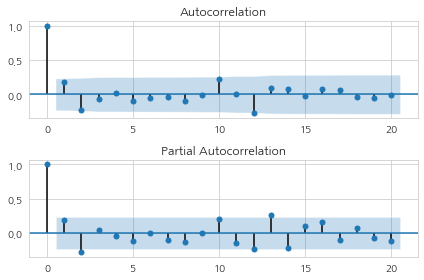

In [15]:
ax1 = plt.subplot(211)
sm.graphics.tsa.plot_acf(result.resid, lags=20, ax=ax1)
ax2 = plt.subplot(212)
sm.graphics.tsa.plot_pacf(result.resid, lags=20, ax=ax2)

plt.tight_layout()
plt.show()

모형??

## 사례3 : 항공운송량

다음 시계열 자료는 항공운송량을 나타낸 것이다.

In [16]:
data = sm.datasets.get_rdataset("AirPassengers")
df = data.data
df.tail()

,time,value
139,1960.583333,606
140,1960.666667,508
141,1960.750000,461
142,1960.833333,390
143,1960.916667,432


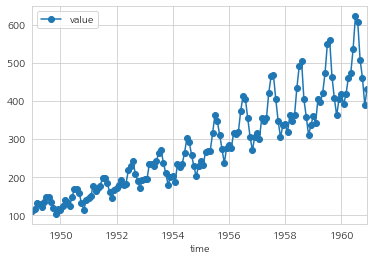

In [17]:
df.plot(x="time", y="value", style=["o-"])
plt.show()

계절성과 선형추세를 가지는 데이터

In [18]:
df["datetime"] = df.time.map(yearfraction2datetime)
df["month"] = df.datetime.dt.month
df["logvalue"] = np.log(df.value)

In [19]:
# 선형회귀분석을 통해 계절성+ 선형추세 추정
result = sm.OLS.from_formula("logvalue ~ C(month) + time + 0", data=df).fit()
y = result.resid # 잔차

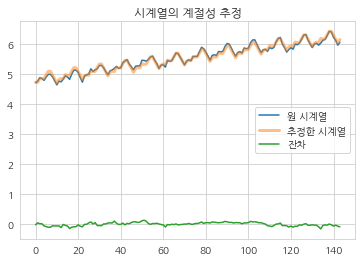

In [22]:
plt.plot(df.logvalue, label="원 시계열")
plt.plot(result.fittedvalues, lw=3, alpha=0.5, label="추정한 시계열")
plt.plot(y, label="잔차")
plt.legend()
plt.title("시계열의 계절성 추정")
plt.show()

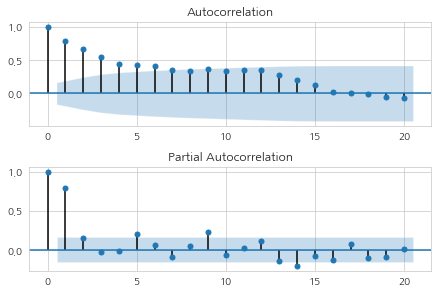

In [23]:
# 데이터의 자기상관계수함수와 편자기상관계함수 구하기
ax1 = plt.subplot(211)
sm.graphics.tsa.plot_acf(y, lags=20, ax=ax1)
ax2 = plt.subplot(212)
sm.graphics.tsa.plot_pacf(y, lags=20, ax=ax2)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()

ACF가 점차적으로 감소하고 PACF가 2차항까지 유의한 값을 나타내고 있어 AR(2) 모형이라고 할 수 있다.